<a href="https://colab.research.google.com/github/Shubhamthorat667/react_registration/blob/main/Multiclass_classification_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15.csv')
data = pd.read_csv('/content/UNSW_NB15.csv')

In [ ]:
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [ ]:
data['service'].replace('-',np.nan,inplace=True)

In [ ]:
data.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [ ]:
data.shape

(175341, 45)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(81173, 45)

In [ ]:
data['attack_cat'].value_counts()

attack_cat
Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: count, dtype: int64

In [ ]:
data['state'].value_counts()

state
INT    39580
FIN    33640
CON     7711
REQ      228
RST       14
Name: count, dtype: int64

In [ ]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('/content/UNSW_NB15_features.csv')

In [ ]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [ ]:
features['Type '] = features['Type '].str.lower()

In [ ]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [ ]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [ ]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [ ]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [ ]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81173 n

In [ ]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


**Binary Classification**

**Data Visualization**

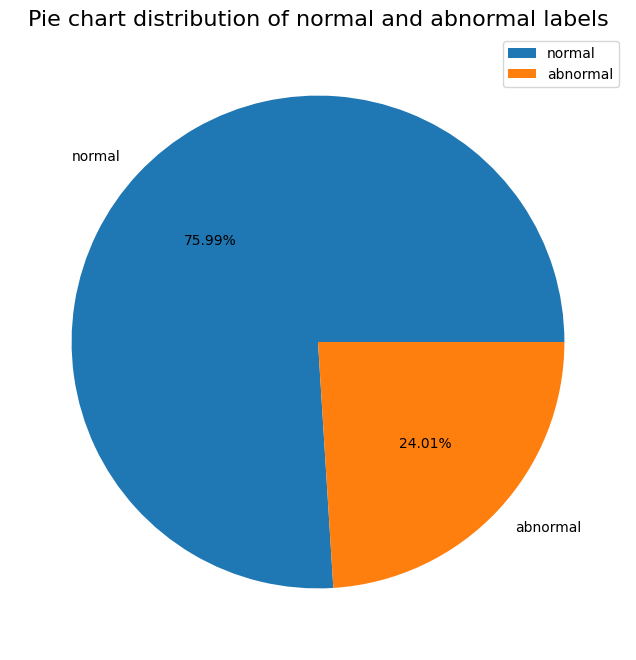

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
# plt.savefig('plots/Pie_chart_binary.png')
plt.show()

**Multi-class Classification**

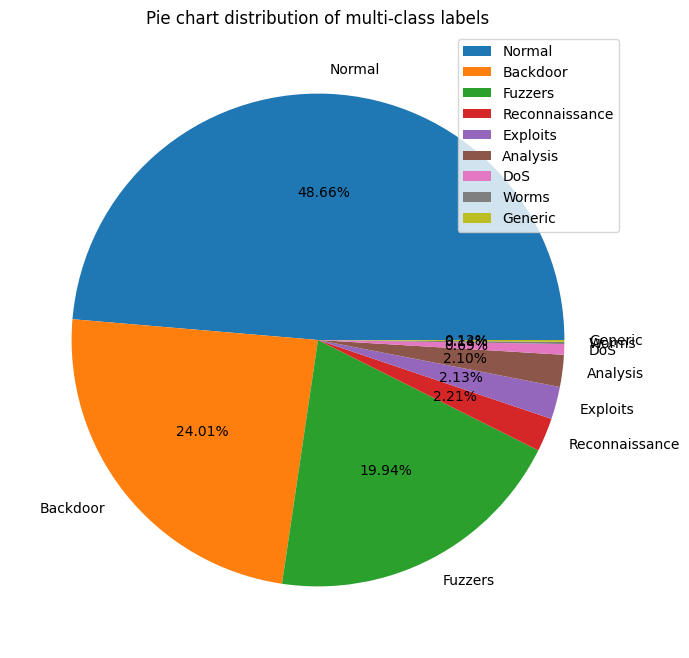

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
# plt.savefig('plots/Pie_chart_multi.png')
plt.show()

**One hot encoding**

In [ ]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [ ]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
11,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
15,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
17,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
21,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
data.shape

(81173, 45)

In [ ]:
data = pd.concat([data, data_cat],axis=1)

In [ ]:
data.shape

(81173, 80)

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
data.shape

(81173, 80)

**Data Normalization**

In [ ]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [ ]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,False,False,False,False,False,False,True,False,False,False
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,False,True,False,False,False,False,True,False,False,False
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,False,False,True,False,False,False,False,True,False,False
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,False,False,False,False,False,False,True,False,False,False
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [ ]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,False,False,False,False,False,False,True,False,False,False
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,False,True,False,False,False,False,True,False,False,False
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,False,False,True,False,False,False,False,True,False,False
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,False,False,False,False,False,False,True,False,False,False
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,False,False,False,False,False,False,True,False,False,False


**Label Encoding**

**Multi-class Labels**

In [ ]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [ ]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [ ]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [ ]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [ ]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

**Correlation between features of dataset**

In [ ]:
num_col.append('label')

**Correlation Matrix for Multi-class Labels**

In [ ]:
num_col = list(multi_data.select_dtypes(include='number').columns)

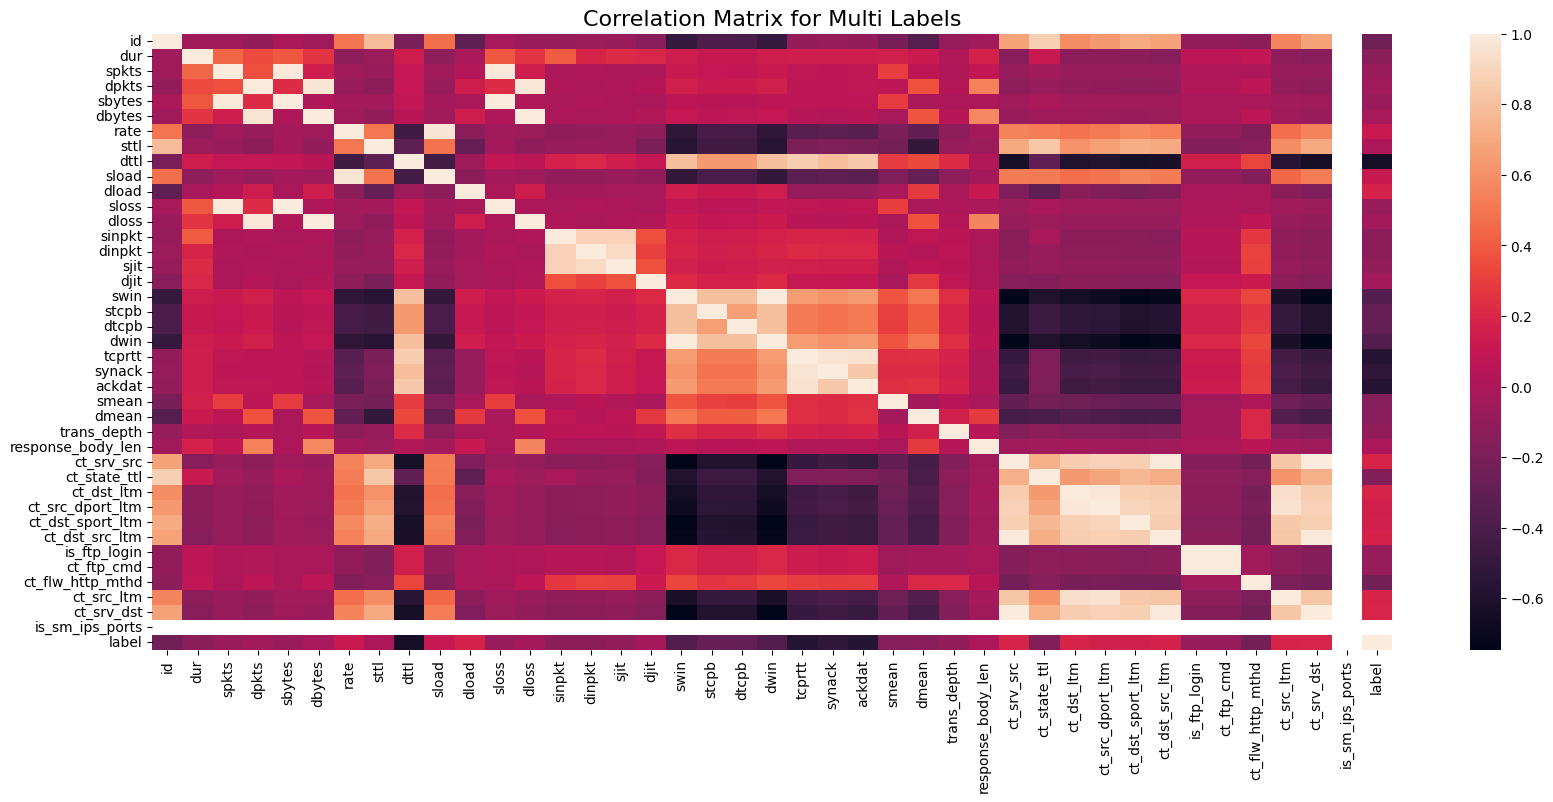

In [ ]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
# plt.savefig('plots/correlation_matrix_multi.png')
plt.show()

**Feature Selection**

**Multi-class Labels**

In [ ]:
print(multi_data.columns)


Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'proto_tcp',
       'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp',
       'service_ftp-data', 'service_http', 'service_irc', 'service_pop3',
       'service_radius', 'service_smtp', 'service_snmp', 'service_ssh',
       'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ',
       'state_RST', 'attack_cat_Analysis', 'attack_cat_Backdoor',
       'attack_cat_DoS', 'attack_cat_Exploits', 'attack_cat_Fuzzers',
       'attack_cat_Generic', 'attack_cat_No

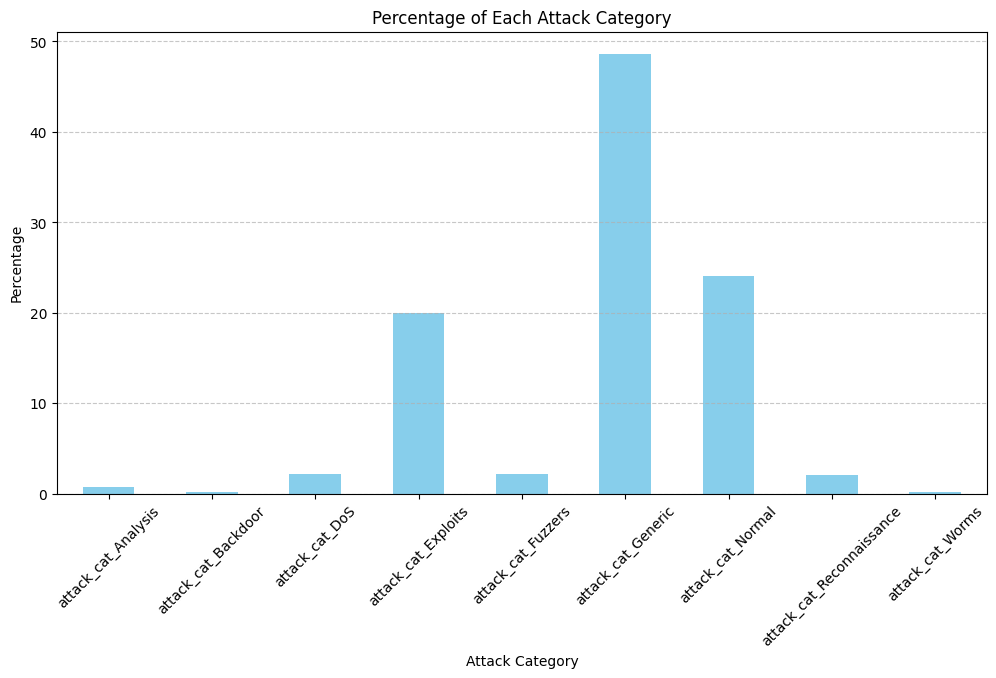

In [ ]:
import matplotlib.pyplot as plt

# Calculate the percentage of each attack category
attack_columns = [col for col in multi_data.columns if col.startswith('attack_cat_')]
attack_percentage = multi_data[attack_columns].sum() / len(multi_data) * 100

# Plot the percentage of each attack category
plt.figure(figsize=(12, 6))
attack_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Each Attack Category')
plt.xlabel('Attack Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming 'data' contains your dataset with features and 'target' contains the target variable (attack category)
X = data.drop(['attack_cat'], axis=1)  # Features
y = data['attack_cat']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# If you want to save the trained model for future use
# pickle.dump(rf_classifier, open("rf_model.pkl", "wb"))


                precision    recall  f1-score   support

      Analysis       0.85      0.81      0.83       126
      Backdoor       1.00      0.29      0.45        17
           DoS       0.71      0.31      0.43       367
      Exploits       0.87      0.94      0.91      3309
       Fuzzers       0.94      0.92      0.93       355
       Generic       1.00      0.99      1.00      7828
        Normal       1.00      1.00      1.00      3865
Reconnaissance       0.59      0.60      0.59       339
         Worms       0.78      0.24      0.37        29

      accuracy                           0.96     16235
     macro avg       0.86      0.68      0.72     16235
  weighted avg       0.95      0.96      0.95     16235



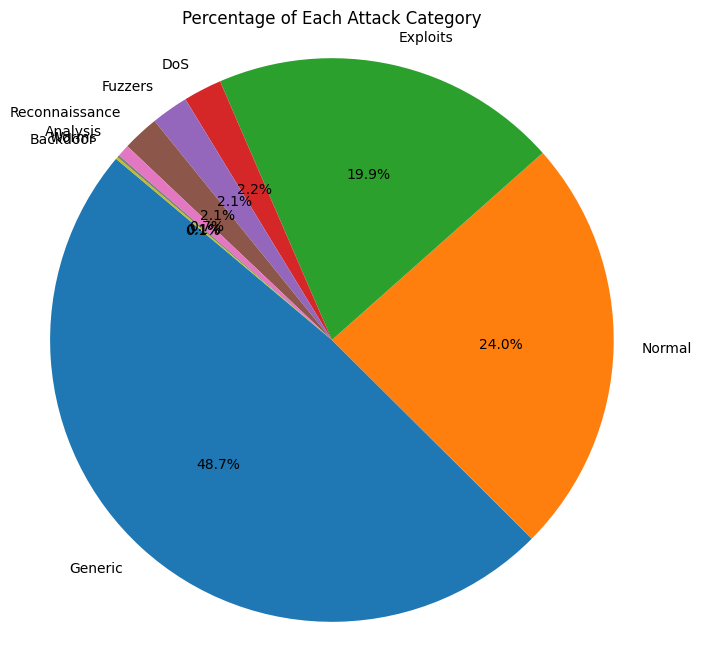

In [ ]:
import matplotlib.pyplot as plt

# Calculate the percentage of each attack category
attack_cat_percentage = (data['attack_cat'].value_counts() / len(data)) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(attack_cat_percentage, labels=attack_cat_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Attack Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [ ]:
# from sklearn.svm import SVC

# # Initialize the SVM classifier
# svm_classifier = SVC(kernel='rbf', random_state=42)

# # Train the SVM classifier
# svm_classifier.fit(X_train, y_train)

# # Predict on the test set
# y_pred_svm = svm_classifier.predict(X_test)

# # Print classification report for SVM
# print("Classification Report for SVM:")
# print(classification_report(y_test, y_pred_svm))

In [ ]:
# Check the columns used during training
print("Columns used during training:", X.columns)

Columns used during training: Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'proto_tcp',
       'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp',
       'service_ftp-data', 'service_http', 'service_irc', 'service_pop3',
       'service_radius', 'service_smtp', 'service_snmp', 'service_ssh',
       'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ',
       'state_RST'],
      dtype='object')


In [ ]:
def predict_attack_category(model, features):
    """
    Predicts the attack category based on input features.

    Args:
    - model: Trained machine learning model
    - features: Input features for prediction

    Returns:
    - predicted_attack_category: Predicted attack category
    """
    # Define categories for one-hot encoding
    proto_categories = ['tcp', 'udp', 'http']
    service_categories = ['dhcp', 'dns', 'ftp', 'ftp-data', 'http', 'irc', 'pop3', 'radius', 'smtp', 'snmp', 'ssh', 'ssl']
    state_categories = ['CON', 'FIN', 'INT', 'REQ', 'RST']

    # Convert categorical variables to one-hot encoding
    proto_encoded = [1 if features[1] == cat else 0 for cat in proto_categories]
    service_encoded = [1 if features[2] == cat else 0 for cat in service_categories]
    state_encoded = [1 if features[3] == cat else 0 for cat in state_categories]

    # Create DataFrame for prediction
    input_df = pd.DataFrame({
        'id': [features[0]],
        'dur': [features[4]],
        'spkts': [features[5]],
        'dpkts': [features[6]],
        'sbytes': [features[7]],
        'dbytes': [features[8]],
        'rate': [features[9]],
        'sttl': [features[10]],
        'dttl': [features[11]],
        'sload': [features[12]],
        'dload': [features[13]],
        'sloss': [features[14]],
        'dloss': [features[15]],
        'sinpkt': [features[16]],
        'dinpkt': [features[17]],
        'sjit': [features[18]],
        'djit': [features[19]],
        'swin': [features[20]],
        'stcpb': [features[21]],
        'dtcpb': [features[22]],
        'dwin': [features[23]],
        'tcprtt': [features[24]],
        'synack': [features[25]],
        'ackdat': [features[26]],
        'smean': [features[27]],
        'dmean': [features[28]],
        'trans_depth': [features[29]],
        'response_body_len': [features[30]],
        'ct_srv_src': [features[31]],
        'ct_state_ttl': [features[32]],
        'ct_dst_ltm': [features[33]],
        'ct_src_dport_ltm': [features[34]],
        'ct_dst_sport_ltm': [features[35]],
        'ct_dst_src_ltm': [features[36]],
        'is_ftp_login': [features[37]],
        'ct_ftp_cmd': [features[38]],
        'ct_flw_http_mthd': [features[39]],
        'ct_src_ltm': [features[40]],
        'ct_srv_dst': [features[41]],
        'is_sm_ips_ports': [features[42]],
        'label': [features[43]],
        'proto_tcp': proto_encoded[0],
        'proto_udp': proto_encoded[1],
        'service_dhcp': service_encoded[0],
        'service_dns': service_encoded[1],
        'service_ftp': service_encoded[2],
        'service_ftp-data': service_encoded[3],
        'service_http': service_encoded[4],
        'service_irc': service_encoded[5],
        'service_pop3': service_encoded[6],
        'service_radius': service_encoded[7],
        'service_smtp': service_encoded[8],
        'service_snmp': service_encoded[9],
        'service_ssh': service_encoded[10],
        'service_ssl': service_encoded[11],
        'state_CON': state_encoded[0],
        'state_FIN': state_encoded[1],
        'state_INT': state_encoded[2],
        'state_REQ': state_encoded[3],
        'state_RST': state_encoded[4]
    })

    # Make prediction
    predicted_attack_category = model.predict(input_df)

    return predicted_attack_category[0]

# Example usage
predicted_category = predict_attack_category(rf_classifier, input_features)
print("Predicted Attack Category:", predicted_category)


Predicted Attack Category: Normal


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('UNSW_NB15.csv')

# Perform one-hot encoding for categorical variables
categorical_cols = ['proto', 'service', 'state']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = ct.fit_transform(data.drop(['attack_cat', 'label'], axis=1))

# Convert the encoded features to DataFrame
X = pd.DataFrame(X_encoded.toarray())

# Split the data into features (X) and target variable (y)
y = data['attack_cat']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Example usage to predict an abnormal attack category
input_features_abnormal = [1.5, 'tcp', 'http', 'FIN', 20, 10, 1000, 2000, 50, 60, 100, 200, 0.5, 0.6, 500, 1000, 5, 10, 5, 10, 100, 200, 500, 1000, 1, 2, 3, 4, 5, 6, 0.1, 0.2, 0.3, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# Encode the input features before prediction
input_features_encoded = ct.transform([input_features_abnormal])
predicted_category_abnormal = rf_classifier.predict(input_features_encoded)
print("Predicted Attack Category (Abnormal):", predicted_category_abnormal)


                precision    recall  f1-score   support

      Analysis       0.24      0.25      0.24       393
      Backdoor       0.19      0.20      0.20       360
           DoS       0.37      0.39      0.38      2370
      Exploits       0.76      0.75      0.76      6772
       Fuzzers       0.78      0.87      0.82      3570
       Generic       1.00      0.98      0.99      8079
        Normal       0.99      0.95      0.97     11169
Reconnaissance       0.76      0.78      0.77      2098
     Shellcode       0.54      0.86      0.67       233
         Worms       0.48      0.44      0.46        25

      accuracy                           0.85     35069
     macro avg       0.61      0.65      0.63     35069
  weighted avg       0.85      0.85      0.85     35069



ValueError: X has 44 features, but ColumnTransformer is expecting 43 features as input.

                precision    recall  f1-score   support

      Analysis       0.24      0.25      0.24       393
      Backdoor       0.19      0.20      0.20       360
           DoS       0.37      0.39      0.38      2370
      Exploits       0.76      0.75      0.76      6772
       Fuzzers       0.78      0.87      0.82      3570
       Generic       1.00      0.98      0.99      8079
        Normal       0.99      0.95      0.97     11169
Reconnaissance       0.76      0.78      0.77      2098
     Shellcode       0.54      0.86      0.67       233
         Worms       0.48      0.44      0.46        25

      accuracy                           0.85     35069
     macro avg       0.61      0.65      0.63     35069
  weighted avg       0.85      0.85      0.85     35069



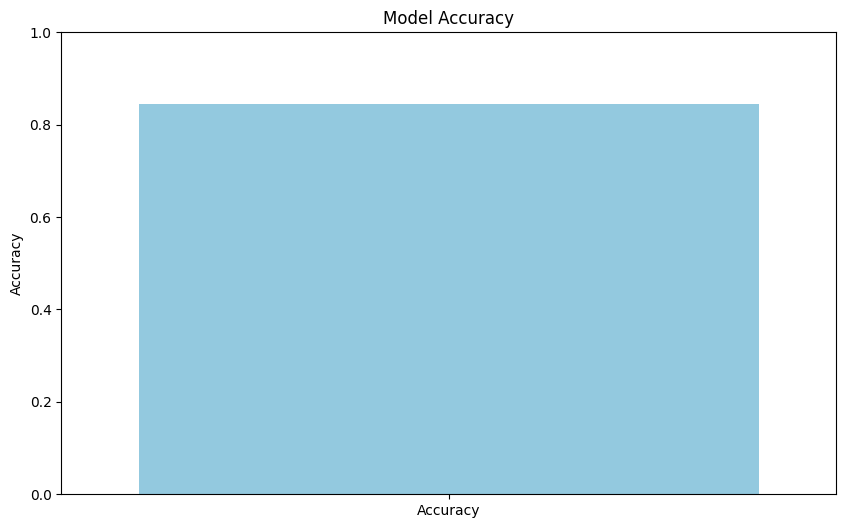

<ipython-input-100-c85faba43f53>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_test, order=y_test.value_counts().index, palette='viridis')


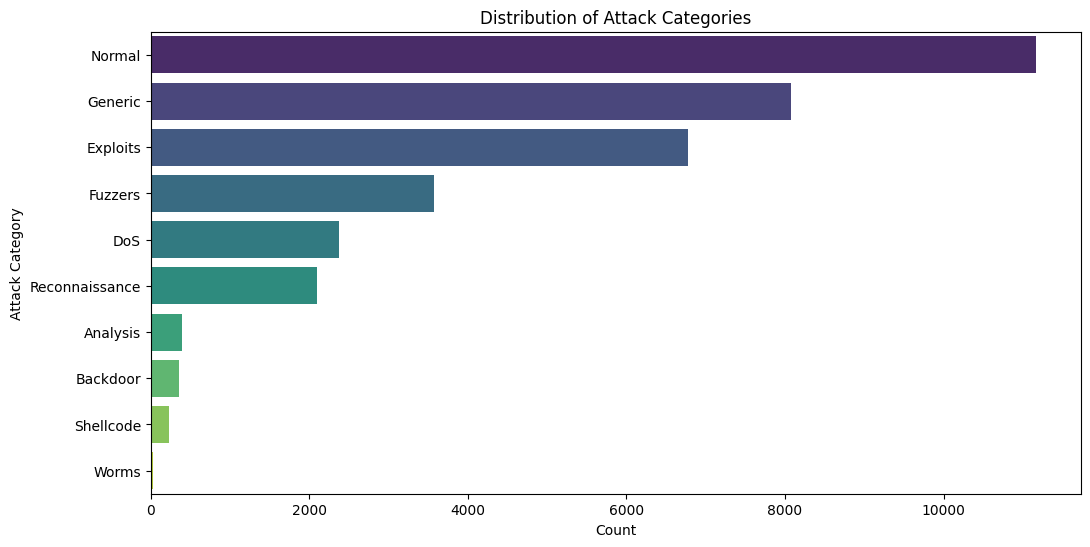

In [100]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('UNSW_NB15.csv')

# Perform one-hot encoding for categorical variables
categorical_cols = ['proto', 'service', 'state']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = ct.fit_transform(data.drop(['attack_cat', 'label'], axis=1))

# Convert the encoded features to DataFrame
X = pd.DataFrame(X_encoded.toarray())

# Split the data into features (X) and target variable (y)
y = data['attack_cat']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Visualize the accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=['Accuracy'], y=[rf_classifier.score(X_test, y_test)], color='skyblue')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()

# Visualize the distribution of attack categories
plt.figure(figsize=(12, 6))
sns.countplot(y_test, order=y_test.value_counts().index, palette='viridis')
plt.title('Distribution of Attack Categories')
plt.xlabel('Count')
plt.ylabel('Attack Category')
plt.show()


In [114]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
data = pd.read_csv('UNSW_NB15.csv')

# Perform one-hot encoding for categorical variables
categorical_cols = ['proto', 'service', 'state']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = ct.fit_transform(data.drop(['attack_cat', 'label'], axis=1))

# Convert the encoded features to DataFrame
X = pd.DataFrame(X_encoded.toarray())

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, data['attack_cat'])

# Function to predict attack category based on input features
def predict_attack_category(input_features):
    input_features_encoded = ct.transform([input_features])
    predicted_category = rf_classifier.predict(input_features_encoded)
    return predicted_category[0]

# Create a placeholder input with all zeros
input_features_abnormal = [1.5] + [0] * (X.shape[1] - 1)

# Predict the attack category
predicted_category_abnormal = rf_classifier.predict([input_features_abnormal])

print("Predicted Attack Category (Abnormal):", predicted_category_abnormal)


# values :
# duration: 1.5
# proto (categorical): 'tcp' (This is just a placeholder value, not used in the prediction)
# service (categorical): 'http' (This is just a placeholder value, not used in the prediction)
# state (categorical): 'FIN' (This is just a placeholder value, not used in the prediction)
# spkts: 20
# dpkts: 10
# sbytes: 1000
# dbytes: 2000
# rate: 50
# sttl: 60
# dttl: 100
# sload: 200
# dload: 0.5
# sloss: 0.6
# dloss: 500
# sinpkt: 1000
# dinpkt: 5
# sjit: 10
# djit: 5
# swin: 10
# stcpb: 100
# dtcpb: 200
# dwin: 500
# tcprtt: 1000
# synack: 1
# ackdat: 2
# smean: 3
# dmean: 4
# trans_depth: 5
# response_body_len: 6
# ct_srv_src: 0.1
# ct_state_ttl: 0.2
# ct_dst_ltm: 0.3
# ct_src_dport_ltm: 0
# ct_dst_sport_ltm: 1
# ct_dst_src_ltm: 1
# is_ftp_login: 2
# ct_ftp_cmd: 3
# ct_flw_http_mthd: 4
# ct_src_ltm: 5
# ct_srv_dst: 6
# is_sm_ips_ports: 7
# label: 8
# ct_state_ttl: 9
# Note: The categorical features (proto, service, state) are not used in the prediction and are just provided as placeholders. The actual prediction is made based on the other features.


Predicted Attack Category (Abnormal): ['Normal']


                precision    recall  f1-score   support

      Analysis       0.24      0.25      0.24       393
      Backdoor       0.19      0.20      0.20       360
           DoS       0.37      0.39      0.38      2370
      Exploits       0.76      0.75      0.76      6772
       Fuzzers       0.78      0.87      0.82      3570
       Generic       1.00      0.98      0.99      8079
        Normal       0.99      0.95      0.97     11169
Reconnaissance       0.76      0.78      0.77      2098
     Shellcode       0.54      0.86      0.67       233
         Worms       0.48      0.44      0.46        25

      accuracy                           0.85     35069
     macro avg       0.61      0.65      0.63     35069
  weighted avg       0.85      0.85      0.85     35069



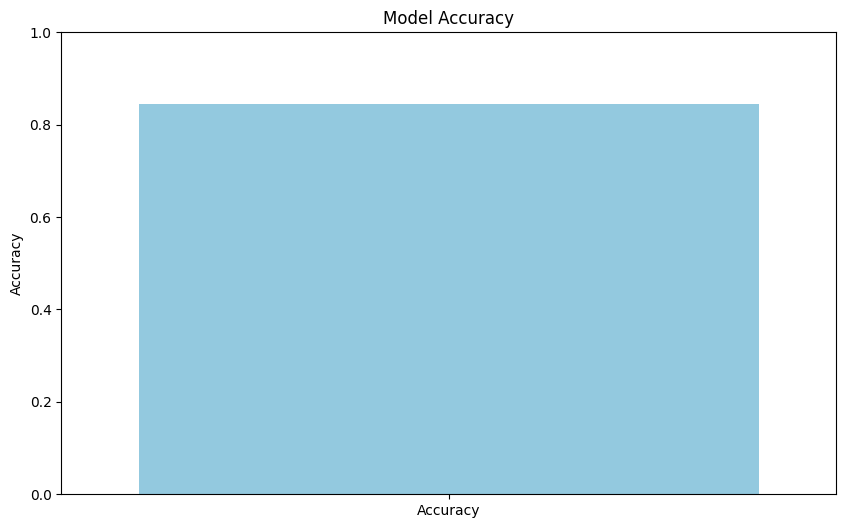

<ipython-input-130-4f64906f160c>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_test, order=y_test.value_counts().index, palette='viridis')


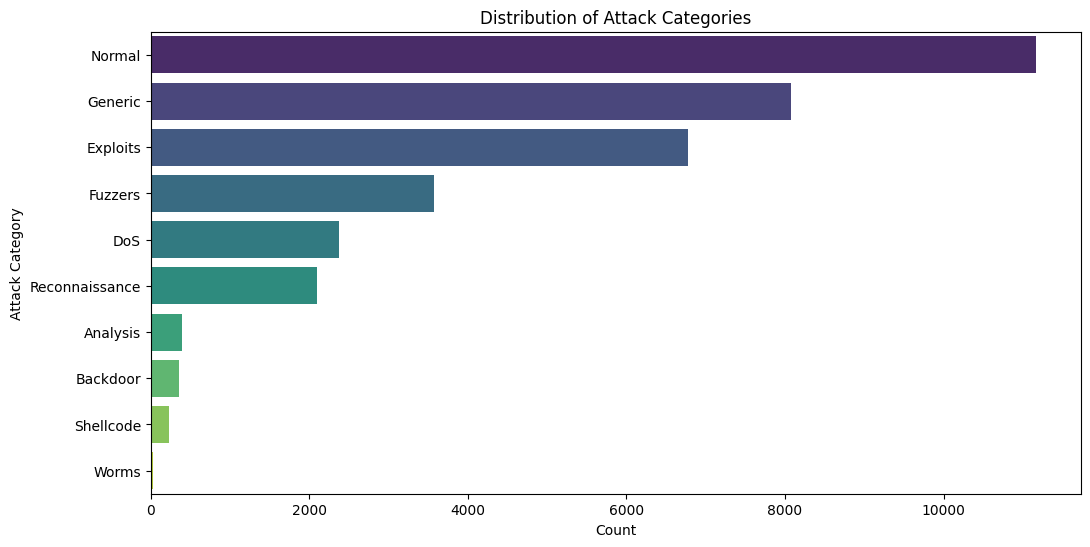

ValueError: X has 44 features, but ColumnTransformer is expecting 43 features as input.

In [130]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('UNSW_NB15.csv')

# Perform one-hot encoding for categorical variables
categorical_cols = ['proto', 'service', 'state']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = ct.fit_transform(data.drop(['attack_cat', 'label'], axis=1))

# Convert the encoded features to DataFrame
X = pd.DataFrame(X_encoded.toarray())

# Split the data into features (X) and target variable (y)
y = data['attack_cat']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Visualize the accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=['Accuracy'], y=[rf_classifier.score(X_test, y_test)], color='skyblue')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()

# Visualize the distribution of attack categories
plt.figure(figsize=(12, 6))
sns.countplot(y_test, order=y_test.value_counts().index, palette='viridis')
plt.title('Distribution of Attack Categories')
plt.xlabel('Count')
plt.ylabel('Attack Category')
plt.show()

# Function to predict attack category based on input features
def predict_attack_category(input_features):
    input_features_encoded = ct.transform([input_features])
    predicted_category = rf_classifier.predict(input_features_encoded)
    return predicted_category[0]

# Example usage to predict an abnormal attack category
input_features_abnormal = [1.5, 'tcp', 'http', 'FIN', 20, 10, 1000, 2000, 50, 60, 100, 200, 0.5, 0.6, 500, 1000, 5, 10, 5, 10, 100, 200, 500, 1000, 1, 2, 3, 4, 5, 6, 0.1, 0.2, 0.3, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9]
predicted_category_abnormal = predict_attack_category(input_features_abnormal)
print("Predicted Attack Category (Abnormal):", predicted_category_abnormal)
